In [1]:
import TimeTagger
import numpy as np
%matplotlib ipympl
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numba

In [2]:
dump_file = r"Z:\PriyaM\swabian_data\20230712_tissue\test_tissue_2023-07-12_154752.1.ttbin"

In [3]:
tagger = TimeTagger.createTimeTaggerVirtual()

In [4]:
laser = 1
frame = 3 
line = 2
photon = 4

# access indiv tags

In [136]:
class timeTaken2(TimeTagger.CustomMeasurement):
    """
    CustomMeasurement that gets channel_1/channel_2.
    """

    def __init__(self, tagger, channels):
        TimeTagger.CustomMeasurement.__init__(self, tagger)
        
        
        #not needed unless accessing channels outside of this
        self.channels = list(channels)
        
        self.counts = [] 
        
        #need to register what channels are being looked at
        for channel in channels:
                    self.register_channel(channel)
                
        #only need this if some variable isn't being cleared in initialization
        #self.clear_impl()

        # At the end of a Measurement construction we must indicate that we
        # have finished
        self.finalize_init()


    def getData(self):
        # lock this instance to avoid conflicting results while measure is
        # running apart.
        with self.mutex:
            counts = self.counts 
        return counts
       
    
    #create own clear
    #def clear_impl(self):
        # the lock is already acquired
        #self.counts =* 0
        


    def process(self, incoming_tags, begin_time, end_time):
        # the lock is already acquired
        # self.data is provided as reference, so it must not be accessed
        # anywhere else without locking the mutex.
        # incoming_tags is provided as a read-only reference. The storage will
        # be deallocated after this call, so you must not store a reference to
        # this object. Make a copy instead.
        
        
        channel_numbers = incoming_tags['time']
        for channel_number in channel_numbers: 
            self.counts.append(channel_number) 
            


In [145]:
tagger.reset()

timeTaken_pho = timeTaken2(tagger, channels=[photon])


tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file)
tagger.waitForCompletion()

True

In [167]:
#sync measurements class??

tagger.reset()
sync = TimeTagger.SynchronizedMeasurements(tagger)

timeTaken_pho = timeTaken2(tagger, channels=[photon])
timeTaken_frame = timeTaken2(tagger, channels=[frame])
timeTaken_laser = timeTaken2(tagger, channels=[laser])
timeTaken_line = timeTaken2(tagger, channels=[line])
timeTaken_pho_frame = timeTaken2(tagger, channels=[photon, frame])
timeTaken_line_las = timeTaken2(tagger, channels=[line, laser])

tests = [
timeTaken_pho,
timeTaken_frame, 
timeTaken_laser, 
timeTaken_line, 
timeTaken_pho_frame, 
timeTaken_line_las]

for test in tests:
    sync.registerMeasurement(test)

sync.start()

tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file, duration=10E12)
tagger.waitForCompletion()

True

In [178]:
#sync measurements class??

tagger.reset()

timeTaken_pho = timeTaken2(tagger, channels=[photon])
tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file, duration=10E12)
tagger.waitForCompletion()

tagger.reset()
timeTaken_frame = timeTaken2(tagger, channels=[frame])
tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file, duration=10E12)
tagger.waitForCompletion()

tagger.reset()
timeTaken_laser = timeTaken2(tagger, channels=[laser])
tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file, duration=10E12)
tagger.waitForCompletion()

tagger.reset()
timeTaken_line = timeTaken2(tagger, channels=[line])
tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file, duration=10E12)
tagger.waitForCompletion()

tagger.reset()
timeTaken_pho_frame = timeTaken2(tagger, channels=[photon, frame])
tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file, duration=10E12)
tagger.waitForCompletion()

tagger.reset()
timeTaken_line_las = timeTaken2(tagger, channels=[line, laser])
tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file, duration=10E12)
tagger.waitForCompletion()

True

In [179]:
print(len(timeTaken_pho.getData()), timeTaken_pho.getData()[0]/1E12, timeTaken_pho.getData()[-1]/1E12)

2200805 0.006342801566 9.99997945342


In [180]:
tests = [
timeTaken_pho,
timeTaken_frame, 
timeTaken_laser, 
timeTaken_line, 
timeTaken_pho_frame, 
timeTaken_line_las]

In [181]:
for test in tests:
    print(test.channels, ":", len(test.getData()), test.getData()[0]/1E12, test.getData()[-1]/1E12)
    print("-----------------")

[4] : 2200805 0.006342801566 9.99997945342
-----------------
[3] : 3 8.358713276442 9.601111128023
-----------------
[1] : 2198936 0.006342804871 9.999979462735
-----------------
[2] : 883 7.804070943239 9.99865513318
-----------------
[4, 3] : 2200808 0.006342801566 9.99997945342
-----------------
[2, 1] : 2199819 0.006342804871 9.999979462735
-----------------


In [122]:
timeTaken_frame.getCaptureDuration()//1E12

10.0

In [37]:
tagger.reset()
times  = timeTaken(tagger)
#times  = PhotonMean(tagger,channels=[photon, frame])
tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file)
tagger.waitForCompletion();


In [38]:
times.getData()

array([], dtype=int32)

# channel/channel example (photon mean per channel)

In [5]:
arr = []

photon = 4
frame = 3

In [6]:
class PhotonMean(TimeTagger.CustomMeasurement):
    """
    CustomMeasurement that gets channel_1/channel_2.
    """

    def __init__(self, tagger, channels):
        TimeTagger.CustomMeasurement.__init__(self, tagger)
        self.channels = list(channels)
        self.counts = np.zeros((len(channels),), dtype=np.int32)

        # Each used channel must be registered
        for channel in channels:
            self.register_channel(channel)

        self.clear_impl()

        # At the end of a Measurement construction we must indicate that we
        # have finished
        self.finalize_init()

    def __del__(self):
        # The measurement must be stopped before deconstruction to avoid
        # concurrent measure() calls
        self.stop()

    def getData(self):
        # lock this instance to avoid conflicting results while measure is
        # running apart.
        with self.mutex:
            counts = np.array(self.counts)
        if counts[1]!=0:
            return counts[0]/counts[1]
        else:
            return "no frames yet"

    def getIndex(self):
        # this method does not depend on the internal state, so there is no
        # need for a lock
        return list(self.channels)

    def clear_impl(self):
        # the lock is already acquired
        self.counts *= 0

    def on_start(self):
        # the lock is already acquired
        pass

    def on_stop(self):
        # the lock is already acquired
        pass

    def process(self, incoming_tags, begin_time, end_time):
        # the lock is already acquired
        # self.data is provided as reference, so it must not be accessed
        # anywhere else without locking the mutex.
        # incoming_tags is provided as a read-only reference. The storage will
        # be deallocated after this call, so you must not store a reference to
        # this object. Make a copy instead.
        channel_numbers, counts = np.unique(incoming_tags["channel"], return_counts=True)
        for channel_number, count in zip(channel_numbers, counts):
            self.counts[self.channels.index(channel_number)] += count
            
            #if count%1E5:
            #    arr.append(count)
            

In [7]:
tagger = TimeTagger.createTimeTaggerVirtual()

In [8]:
slider_duration = widgets.IntSlider(
    orientation='horizontal',
    description='Duration (ps):',
    step=.5E12,
    min=0,
    max=45E12
)

slider_begin = widgets.IntSlider(
    orientation='horizontal',
    description='Start at (ps):',
    step=.5E12,
    min=0,
    max=45E12
)

slider_duration.layout.width = '60%'
slider_begin.layout.width = '60%'


In [9]:

def update_duration(begin, duration):
    arr.clear()
    tagger.reset()
    photon_mean = PhotonMean(tagger, channels=[photon, frame])
    
    tagger.setReplaySpeed(-1)
    replay = tagger.replay(dump_file, begin=begin, duration=duration)
    tagger.waitForCompletion()
    
    photon_mean_data = photon_mean.getData()
    print("mean photons per frame:", photon_mean_data)
    
    print("length= ",len(arr), '\n', arr)
    
widgets.interact(update_duration, begin=slider_begin, duration=slider_duration)


interactive(children=(IntSlider(value=0, description='Start at (ps):', layout=Layout(width='60%'), max=4500000…

<function __main__.update_duration(begin, duration)>

# Photon median

In [5]:
class PhotonMedian(TimeTagger.CustomMeasurement):
    """
    counts number of photons per each frame, with getMedian() will return median photons
    """

    def __init__(self, tagger, count_channel, click_channel):
        TimeTagger.CustomMeasurement.__init__(self, tagger)
        self.count_channel = count_channel
        self.click_channel = click_channel

        # The method register_channel(channel) activates
        # that data from the respective channels is transferred
        # from the Time Tagger to the PC.
        self.register_channel(channel=count_channel)
        self.register_channel(channel=click_channel)
        

        self.clear_impl()

        # At the end of a CustomMeasurement construction,
        # we must indicate that we have finished.
        self.finalize_init()

    def __del__(self):
        # The measurement must be stopped before deconstruction to avoid
        # concurrent process() calls.
        self.stop()

    def getData(self):
        # Acquire a lock this instance to guarantee that process() is not running in parallel
        # This ensures to return a consistent data.
        with self.mutex:
            return self.data.copy()[:self.index]

    def getIndex(self):
        # This method does not depend on the internal state, so there is no
        # need for a lock.
        arr = np.arange(0, self.index)
        return arr
    
    def getMedian(self):
        with self.mutex:
            med1 = self.data.copy()[(self.index//2)]
            med2 = self.data.copy()[((self.index-1)//2)]
            return (med1+med2)/2

    def clear_impl(self):
        # The lock is already acquired within the backend.
        self.index = 0
        self.data = np.zeros((100,), dtype=np.uint64)

    def on_start(self):
        # The lock is already acquired within the backend.
        pass

    def on_stop(self):
        # The lock is already acquired within the backend.
        pass
    
    #In Python, it is advisable to use numpy.array() 
    #for calculation or even pre-compiled code with Numba if an explicit iteration of the tags is necessary

    @staticmethod
    @numba.jit(nopython=True, nogil=True)
    def fast_process(
            tags,
            data,
            count_channel,
            click_channel,
            index):
        """
        A precompiled version for better performance
        nopython=True: Only a subset of the python syntax is supported.
                       Avoid everything but primitives and numpy arrays.
                       All slow operation will yield an exception
        nogil=True:    This method will release the global interpreter lock. So
                       this method can run in parallel with other python code
        """
        for tag in tags:
            if tag['type'] == TimeTagger.TagType.TimeTag and tag['channel'] == count_channel:
                data[index] +=1
            if tag['type'] == TimeTagger.TagType.TimeTag and tag['channel'] == click_channel:
                index +=1
                    
        return index

    def process(self, incoming_tags, begin_time, end_time):
        """
        Main processing method for the incoming raw time-tags.

        The lock is already acquired within the backend.
        self.data is provided as reference, so it must not be accessed
        anywhere else without locking the mutex.

        Parameters
        ----------
        incoming_tags
            The incoming raw time tag stream provided as a read-only reference.
            The storage will be deallocated after this call, so you must not store a reference to
            this object. Make a copy instead.
            Please note that the time tag stream of all channels is passed to the process method,
            not only the ones from register_channel(...).
        begin_time
            Begin timestamp of the of the current data block.
        end_time
            End timestamp of the of the current data block.
        """
        self.index = PhotonMedian.fast_process(
            incoming_tags,
            self.data,
            self.count_channel,
            self.click_channel,
            self.index)


In [18]:
tagger.reset()

photon_med  = PhotonMedian(tagger,count_channel= frame, click_channel= frame)
#photon_mean = PhotonMean(tagger, channels=[photon, frame])

tagger.setReplaySpeed(-1)
replay = tagger.replay(dump_file)
tagger.waitForCompletion()

True

In [17]:
(photon_med.getData())

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint64)

In [13]:
np.median(photon_med.getData())

1.0

In [10]:
#photon_mean.getIndex(), photon_mean.getData()
#photon_mean.
photon_med.getMedian()

578121.5

In [25]:
%matplotlib inline

Text(0.5, 1.0, 'Median= 578121.5')

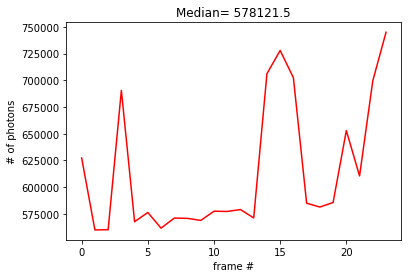

In [31]:

x_custom_histogram = photon_med.getIndex()
y_custom_histogram = photon_med.getData()


plt.plot(x_custom_histogram, y_custom_histogram,'r')
#plt.plot(photon_mean.getIndex(), photon_mean.getData())

plt.xlabel('frame #')
plt.ylabel('# of photons')
plt.title(('Median= '+ str(photon_med.getMedian())))


In [61]:
photon_med.getMedian()

578121.5

In [10]:
x_custom_histogram, y_custom_histogram

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([627228, 559951, 560180, 690452, 567660, 576280, 561581, 571035,
        570756, 568827, 577448, 577240, 579003, 571183, 706105, 727837,
        702348, 584937, 581351, 585613, 652867, 610461, 699495, 744894],
       dtype=uint64))